In [24]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
path = 'dest_arrange2/data_log(-872586238).json'

In [99]:
records = pd.read_json(path)

In [106]:
records.head(10)

,time_start,source_ip,dest_ip,protocol_n,STRTITLE,source_mac,dest_mac,pkt_size
0,2019/08/20 오후 1:59:54,-757408877,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
1,2019/08/20 오후 1:59:54,-757408882,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
2,2019/08/20 오후 1:59:54,-757408878,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
3,2019/08/20 오후 1:59:54,-757408884,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
4,2019/08/20 오후 1:59:54,-757408874,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
5,2019/08/20 오후 1:59:54,-757408883,-872586238,6,tcp null scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
6,2019/08/20 오후 1:59:54,-757408878,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
7,2019/08/20 오후 1:59:54,-757408874,-872586238,6,xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
8,2019/08/20 오후 1:59:54,-757408879,-872586238,6,full xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148
9,2019/08/20 오후 1:59:54,-757408877,-872586238,6,xmas scan,00.15.C6.AE.50.C0,00.1B.17.00.01.10,148


In [110]:
records[records['pkt_size'] >= 1000]

,time_start,source_ip,dest_ip,protocol_n,STRTITLE,source_mac,dest_mac,pkt_size
126704,2019/08/20 오후 2:48:45,-757408884,-872586238,6,tcp syn flooding,00.15.C6.AE.50.C0,00.1B.17.00.01.10,28928
168287,2019/08/20 오후 2:49:13,-757408877,-872586238,6,tcp syn flooding,00.15.C6.AE.50.C0,00.1B.17.00.01.10,28840


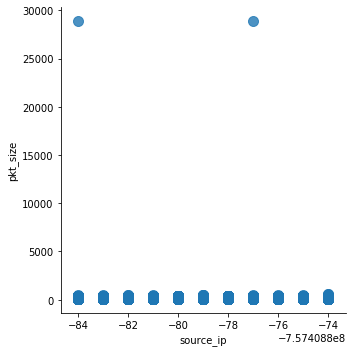

In [102]:
sns.lmplot('source_ip', 'pkt_size', data = records, fit_reg = False, scatter_kws={"s":100})

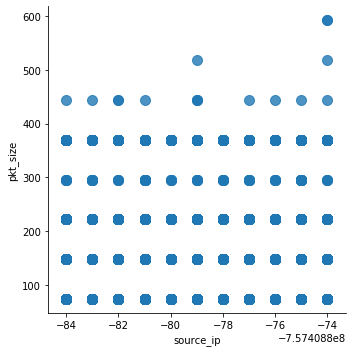

In [111]:
sns.lmplot('source_ip', 'pkt_size', data = records[records['pkt_size'] <= 1000], fit_reg = False, scatter_kws={"s":100})

In [83]:
points = records.values

In [94]:
points

array([['2019/08/13 오후 3:04:32', -757408879, -874088599, 6, 'xmas scan',
        'C0.67.AF.4A.A8.80', '50.3D.E5.FF.2C.80', 148],
       ['2019/08/13 오후 3:04:32', -757408879, -874088599, 6, 'xmas scan',
        'C0.67.AF.4A.A8.80', '50.3D.E5.FF.2C.80', 148],
       ['2019/08/13 오후 3:04:32', -757408879, -874088599, 6,
        'tcp null scan', 'C0.67.AF.4A.A8.80', '50.3D.E5.FF.2C.80', 148],
       ['2019/08/13 오후 3:04:32', -757408875, -874088599, 6, 'xmas scan',
        'C0.67.AF.4A.A8.80', '50.3D.E5.FF.2C.80', 148],
       ['2019/08/13 오후 3:04:32', -757408879, -874088599, 6,
        'tcp null scan', 'C0.67.AF.4A.A8.80', '50.3D.E5.FF.2C.80', 148]],
      dtype=object)

In [95]:
records['STRTITLE'].astype('category').cat.codes

0    1
1    1
2    0
3    1
4    0
dtype: int8

In [97]:
pd.get_dummies(records['STRTITLE'])

,tcp null scan,xmas scan
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
